In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# --- Load and Explore the Dataset ---
df = pd.read_csv('Zoo.csv')
print("Initial DataFrame Info:")
df.info()
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("-" * 50)

# The 'animal name' column is an identifier and is not useful for classification.
# We will drop it from our features.
# The 'type' column is our target variable.
X = df.drop(['animal name', 'type'], axis=1)
y = df['type']

Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB

In [2]:
# --- Preprocessing: Handling Outliers and Scaling ---
# The dataset consists of mostly binary features. The 'legs' column is
# a numerical count and can be treated as a categorical variable or scaled.
# For simplicity and due to the small number of unique values, we'll keep it as-is.
# There are no missing values in this dataset, and given the nature of the features,
# explicit outlier removal is not necessary.

# Since KNN is a distance-based algorithm, it is crucial to scale the features.
# This ensures that no single feature dominates the distance calculation.
# We will use StandardScaler.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print("\nDataFrame after Scaling (first 5 rows):")
print(X_scaled.head())
print("-" * 50)


DataFrame after Scaling (first 5 rows):
       hair  feathers      eggs      milk  airborne   aquatic  predator  \
0  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208  0.896421   
1  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208 -1.115547   
2 -0.861034 -0.496904  0.843721 -0.826640 -0.558291  1.343710  0.896421   
3  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208  0.896421   
4  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208  0.896421   

    toothed  backbone  breathes  venomous      fins      legs      tail  \
0  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540 -1.698416   
1  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540  0.588784   
2  0.809776   0.46569 -1.951800 -0.293294  2.222876 -1.404435  0.588784   
3  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540 -1.698416   
4  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540  0.588784   

   domestic   catsize  
0 -0.384353  1.138180  
1 -0.3843

Training set size: 80 samples
Testing set size: 21 samples
--------------------------------------------------


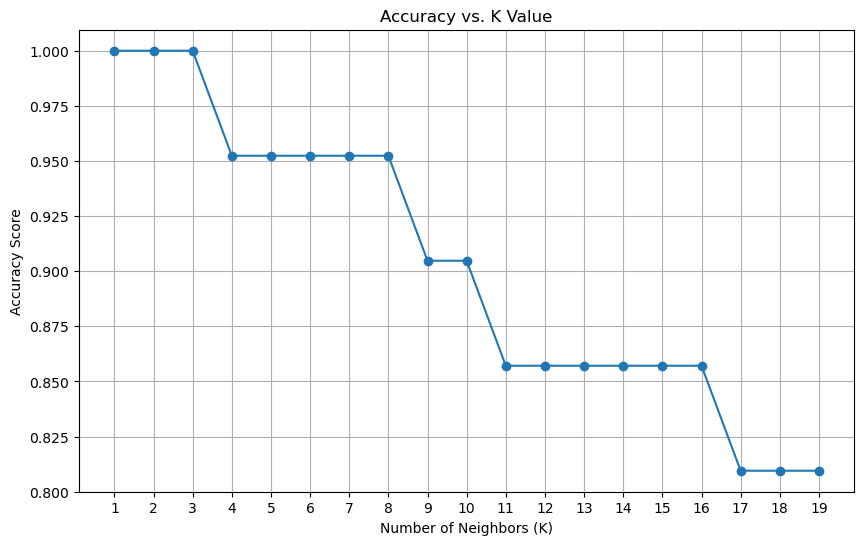

Optimal K value is: 1
--------------------------------------------------


In [3]:
# --- Split the Dataset (80% training, 20% testing) ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print("-" * 50)

# --- Implement and Tune K-Nearest Neighbours ---
# We'll use a loop to find the best K value by evaluating accuracy on the test set.
# This approach helps us select an optimal number of neighbors.
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

# Plot the results to find the optimal K
plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o')
plt.title('Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Based on the plot, we select the K that gives the highest accuracy.
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal K value is: {optimal_k}")
print("-" * 50)

# --- Train the final KNN model with the optimal K ---
knn_final = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
knn_final.fit(X_train, y_train)
y_pred_final = knn_final.predict(X_test)

In [4]:
# --- Evaluate the Classifier's Performance ---
accuracy = accuracy_score(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_final, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred_final, average='weighted', zero_division=0)

print("--- Classifier Performance on Test Set ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("-" * 50)

--- Classifier Performance on Test Set ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
--------------------------------------------------


In [5]:
# --- Visualize the Decision Boundaries (using PCA for 2D visualization) ---
# Since we have many features, we'll use Principal Component Analysis (PCA)
# to reduce the data to two dimensions for visualization.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a meshgrid to plot the decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))


In [6]:
# Use the trained model to predict the class for each point in the meshgrid
knn_pca = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
knn_pca.fit(X_pca, y)
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


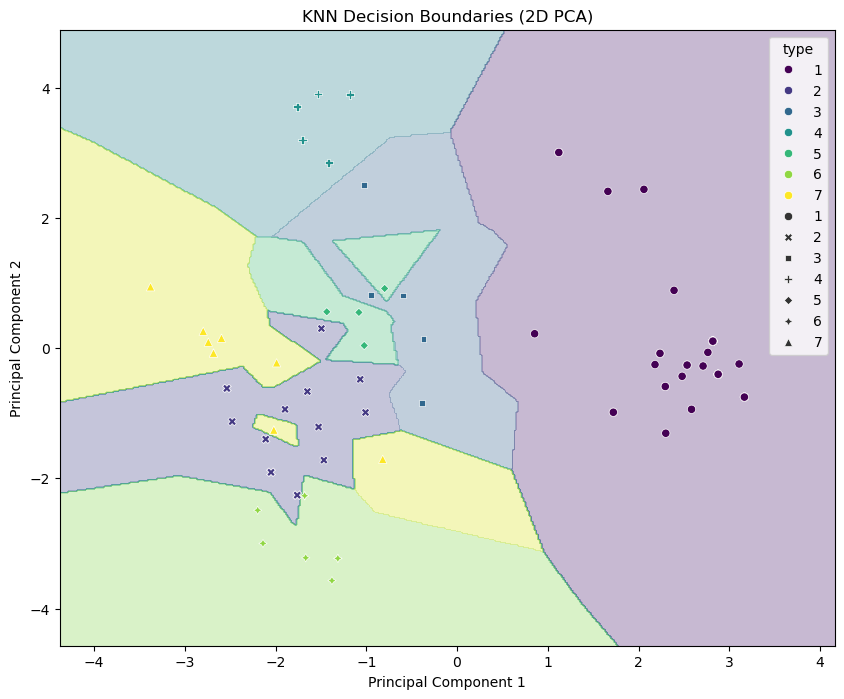

In [7]:
# Plot the decision boundaries
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.viridis)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', style=y)
plt.title('KNN Decision Boundaries (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
''' 
Interview Questions:
1. What are the key hyperparameters in KNN?

The two most important hyperparameters in KNN are:

n_neighbors (or K): This is the number of neighbors to consider when making a prediction. A small K can make the model sensitive to noise 
and outliers, while a large K can smooth out the decision boundaries but might miss local patterns.

distance_metric: This determines how the distance between data points is calculated. The choice of metric is critical as
it directly influences which neighbors are considered "nearest." Common choices include Euclidean, Manhattan, and Minkowski distance.

''''

In [ ]:
'''
2. What distance metrics can be used in KNN?

There are several distance metrics that can be used, with the most common being:

Euclidean Distance: This is the standard straight-line distance between two points. It is the most widely used metric for continuous features.

Manhattan Distance: Also known as L1 norm or taxicab distance, this metric calculates the sum of the absolute differences between the coordinates
of two points. It is useful when features are not necessarily straight lines, such as in grids.

Minkowski Distance: This is a generalization of both Euclidean and Manhattan distances. By changing a single parameter (p), 
it can be adjusted to be either of the other two. When p=1, it is the Manhattan distance, and when p=2, it is the Euclidean distance.

'''